In [1]:
from src.test_non_local_switching_non_stationary_model import load_data

is_ripple, spikes, position, speed, env, time = load_data(work_computer=False)

In [2]:
from src.test_non_local_switching_non_stationary_model import (
    setup_nonlocal_switching_model,
)

(
    emission_design_matrix,
    emission_predict_matrix,
    initial_conditions,
    discrete_state_transitions,
    discrete_transition_coefficients,
    discrete_transition_design_matrix,
    continuous_state_transitions,
    state_ind,
    zero_rates,
    is_training,
    state_names,
) = setup_nonlocal_switching_model(
    is_ripple,
    spikes,
    position,
    speed,
    env,
    no_spike_rate_threshold=0.01,
    is_stationary_discrete_transition=True,
    include_no_spike_state=True,
    rw_movement_var=12.0,
)

In [3]:
import numpy as np


log_likelihood = np.load("log_likelihood_fragmented.npy")

Text(0.5, 1.0, 'Discrete State Transition')

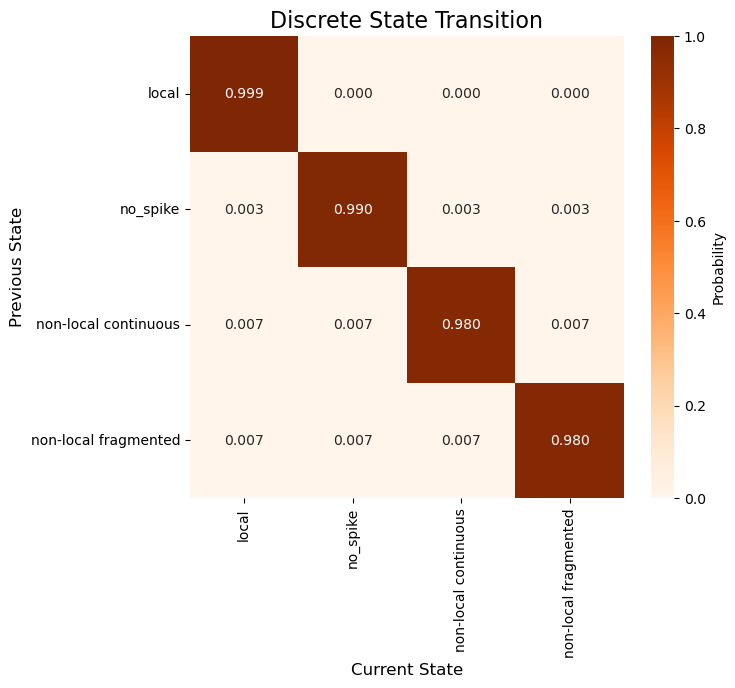

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

vmin, vmax, fmt = 0.0, 1.0, "0.03f"
label = "Probability"
cmap = "Oranges"

fig, ax = plt.subplots(1, 1, figsize=(7, 6))
sns.heatmap(
    data=discrete_state_transitions,
    vmin=vmin,
    vmax=vmax,
    annot=True,
    fmt=fmt,
    cmap=cmap,
    xticklabels=state_names,
    yticklabels=state_names,
    ax=ax,
    cbar_kws={"label": label},
)
ax.set_ylabel("Previous State", fontsize=12)
ax.set_xlabel("Current State", fontsize=12)
ax.set_title("Discrete State Transition", fontsize=16)

In [5]:
discrete_state_transitions.sum(axis=1)

array([1., 1., 1., 1.])

In [6]:
from src.test_non_local_switching_non_stationary_model import fit_switching_model
import numpy as np

stickiness = np.zeros((4, 1))
stickiness[0] = 65
stickiness[1] = 100_000
stickiness[2] = 65
stickiness[3] = 65

(
    predicted_state,
    acausal_posterior,
    acausal_state_probabilities,
    causal_posterior,
    marginal_log_likelihoods,
    initial_conditions,
    discrete_state_transitions,
    discrete_transition_coefficients,
    discrete_transition_design_matrix,
    non_local_rates,
    log_likelihood,
) = fit_switching_model(
    spikes,
    emission_design_matrix,
    emission_predict_matrix,
    initial_conditions,
    discrete_state_transitions,
    continuous_state_transitions,
    state_ind,
    zero_rates,
    is_training,
    env,
    discrete_transition_coefficients=discrete_transition_coefficients,
    discrete_transition_design_matrix=discrete_transition_design_matrix,
    max_iter=20,
    fit_inital_conditions=False,
    fit_discrete_transition=True,
    fit_likelihood=False,
    concentration=1.1,
    stickiness=stickiness,
    log_likelihood=log_likelihood,
)

[[9.99000000e-01 3.33333333e-04 3.33333333e-04 3.33333333e-04]
 [3.33333333e-03 9.90000000e-01 3.33333333e-03 3.33333333e-03]
 [6.66666667e-03 6.66666667e-03 9.80000000e-01 6.66666667e-03]
 [6.66666667e-03 6.66666667e-03 6.66666667e-03 9.80000000e-01]]
Likelihoods
Expectation Step
Maximization Step
Stats
iteration 1, likelihood: -1908381.76860106
[[9.93411621e-01 1.13659900e-03 5.08596299e-03 3.65816817e-04]
 [4.19374574e-03 9.94066783e-01 1.39995357e-03 3.39517626e-04]
 [7.18870112e-03 1.90030585e-03 9.89098083e-01 1.81291023e-03]
 [2.12789074e-02 9.55585076e-03 2.52657665e-02 9.43899475e-01]]
Likelihoods
Expectation Step
Maximization Step
Stats
iteration 2, likelihood: -1906101.0105717275, change: 2280.7580293323845
[[9.88310246e-01 1.94311002e-03 9.58718075e-03 1.59462954e-04]
 [6.35604717e-03 9.93126089e-01 4.45749675e-04 7.21146166e-05]
 [1.02550715e-02 9.69008943e-04 9.87463414e-01 1.31250579e-03]
 [3.41367462e-02 9.02493346e-03 2.91322057e-02 9.27706115e-01]]
Likelihoods
Expecta

In [87]:
non_local_rates = np.load("non_local_rates.npy")
non_local_rates[~env.is_track_interior_, :] = 0.0

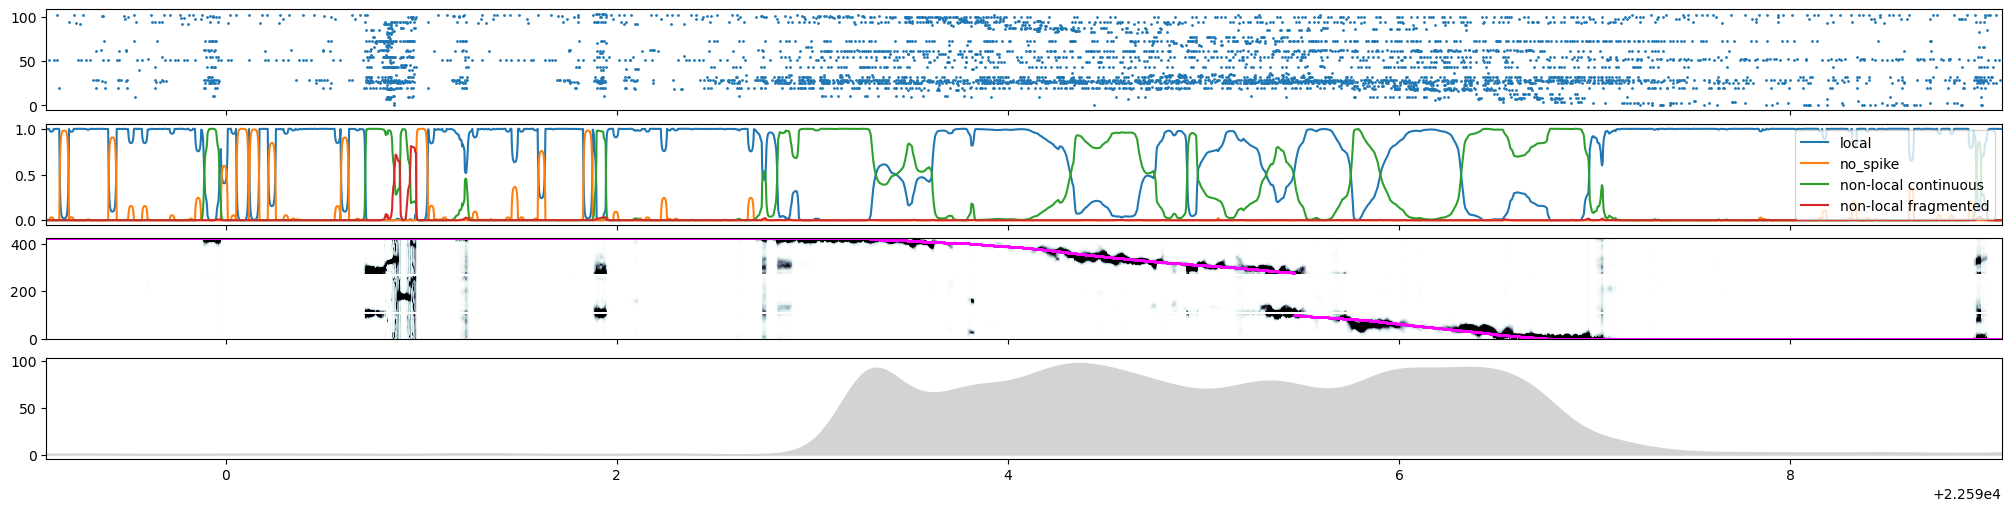

In [88]:
from src.test_non_local_switching_non_stationary_model import plot_switching_model


plot_switching_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    env,
    state_ind,
    acausal_state_probabilities,
    acausal_posterior,
    state_names,
    time_slice=slice(100_000, 105_000),
)

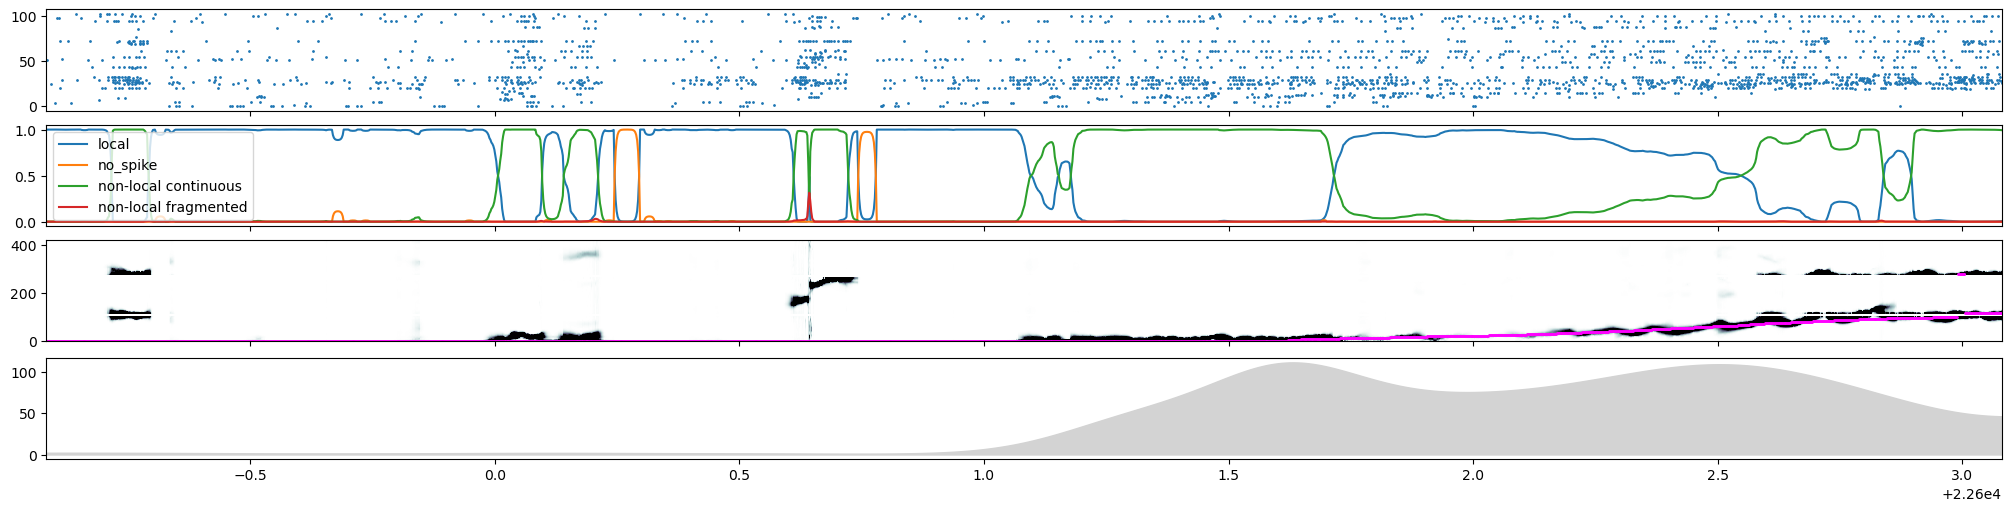

In [89]:
plot_switching_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    env,
    state_ind,
    acausal_state_probabilities,
    acausal_posterior,
    state_names,
    time_slice=slice(105_000, 107_000),
)

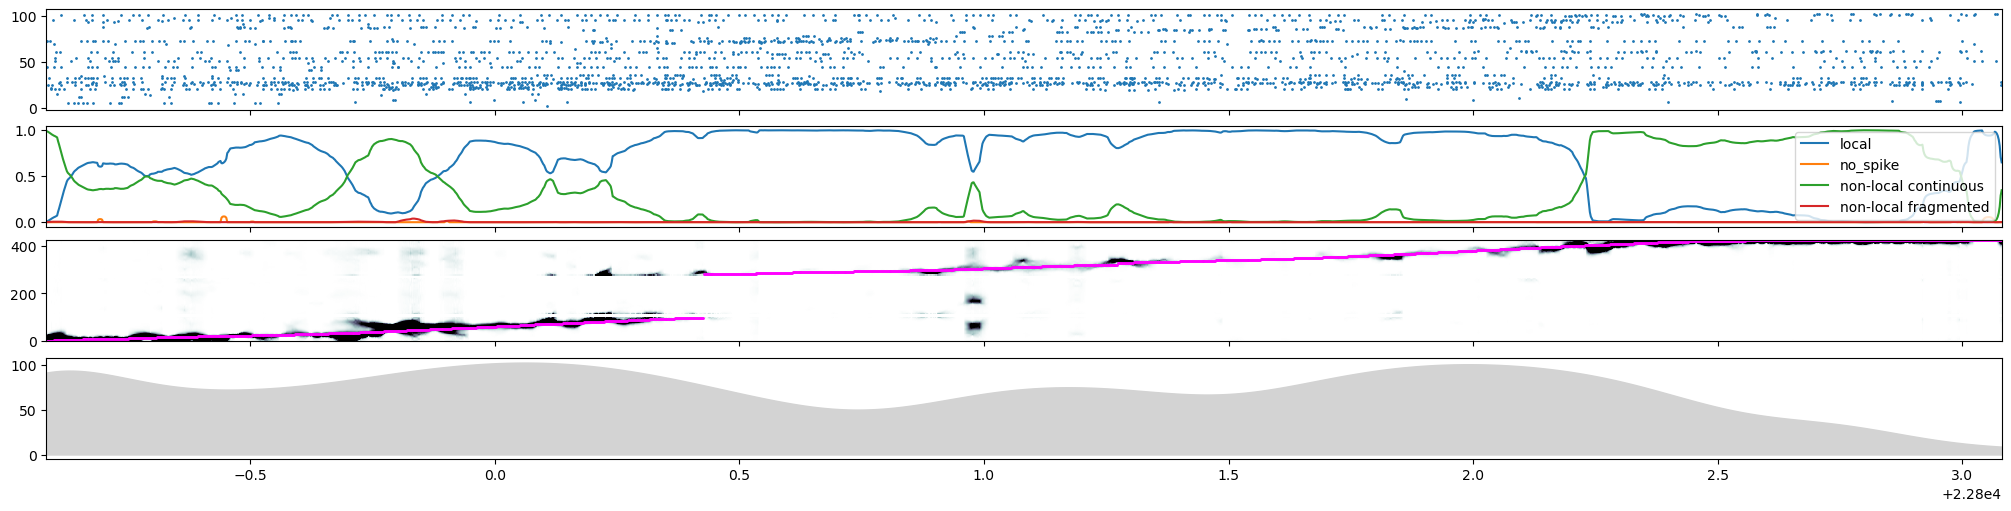

In [10]:
plot_switching_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    env,
    state_ind,
    acausal_state_probabilities,
    acausal_posterior,
    state_names,
    time_slice=slice(205_000, 207_000),
)

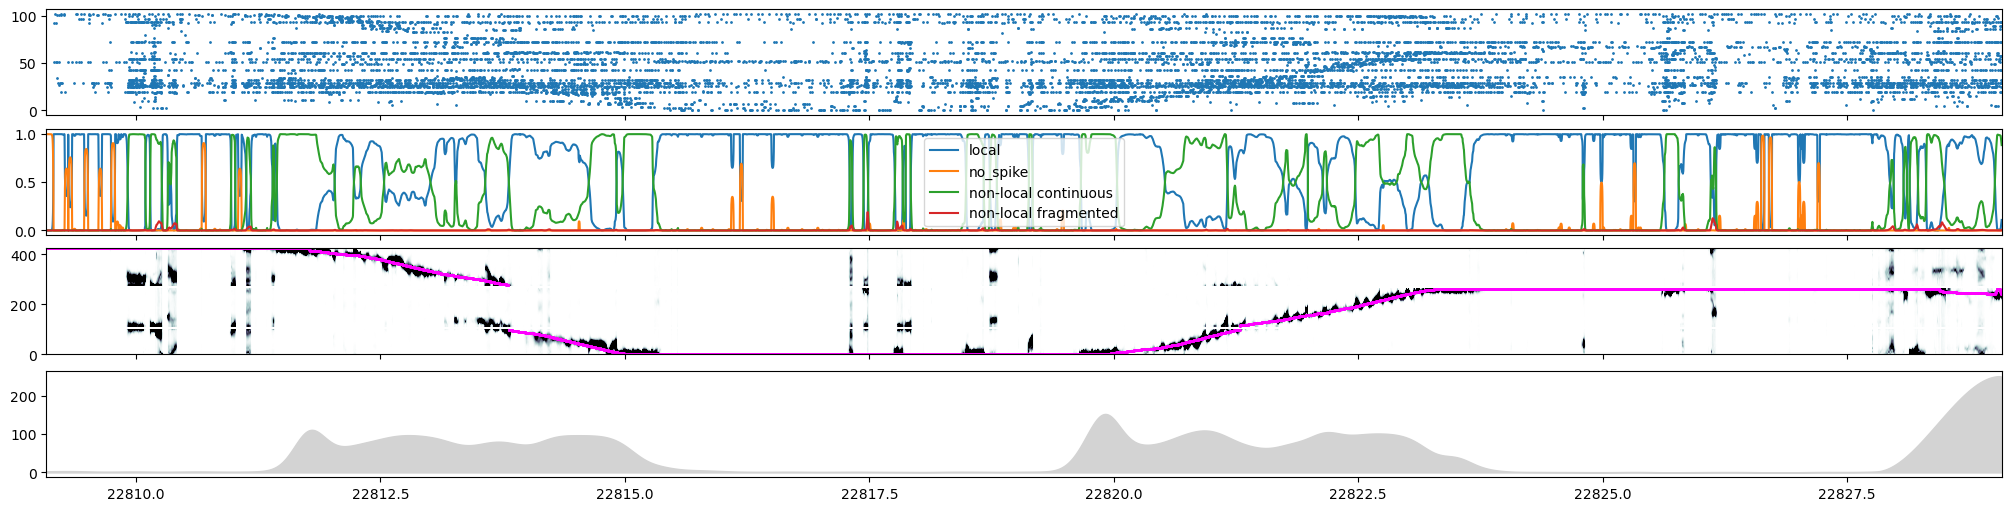

In [90]:
plot_switching_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    env,
    state_ind,
    acausal_state_probabilities,
    acausal_posterior,
    state_names,
    time_slice=slice(210_000, 220_000),
)

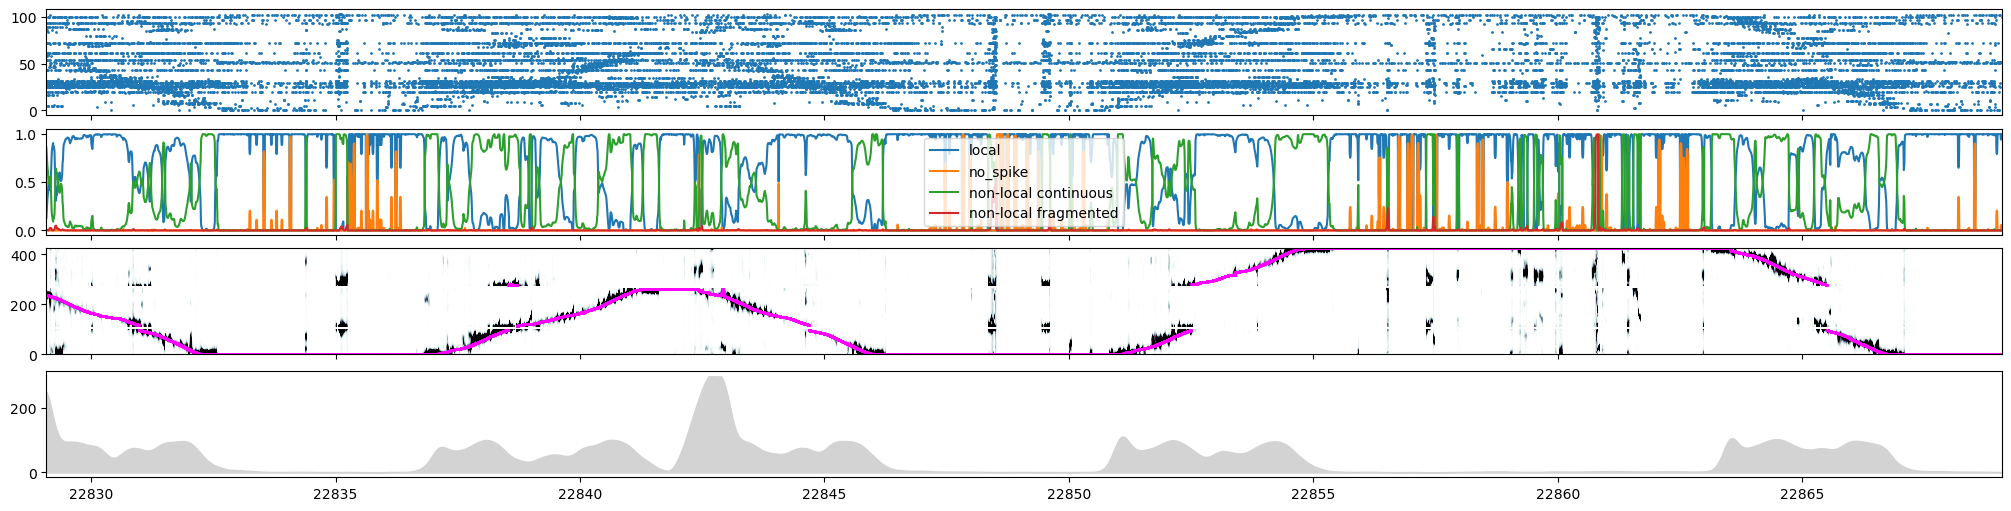

In [91]:
plot_switching_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    env,
    state_ind,
    acausal_state_probabilities,
    acausal_posterior,
    state_names,
    time_slice=slice(220_000, 240_000),
)

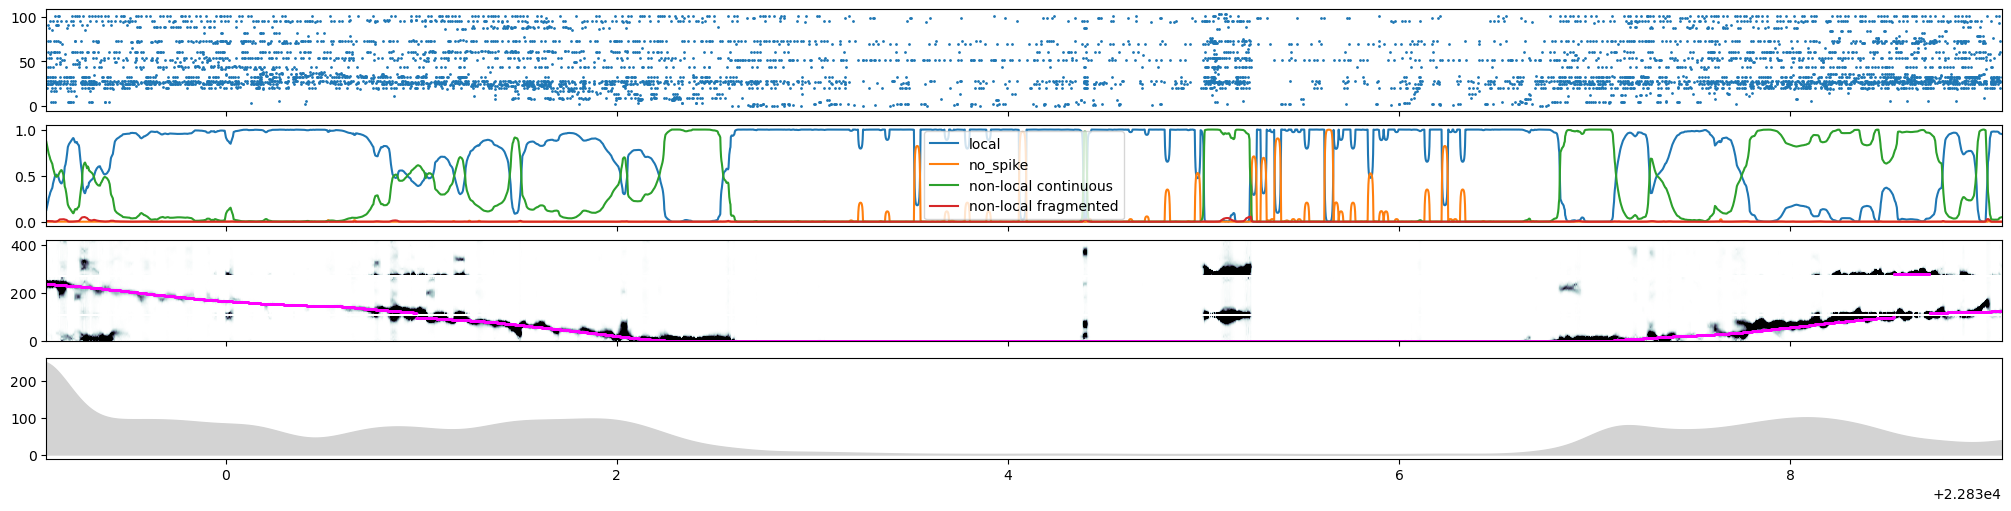

In [13]:
plot_switching_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    env,
    state_ind,
    acausal_state_probabilities,
    acausal_posterior,
    state_names,
    time_slice=slice(220_000, 225_000),
)

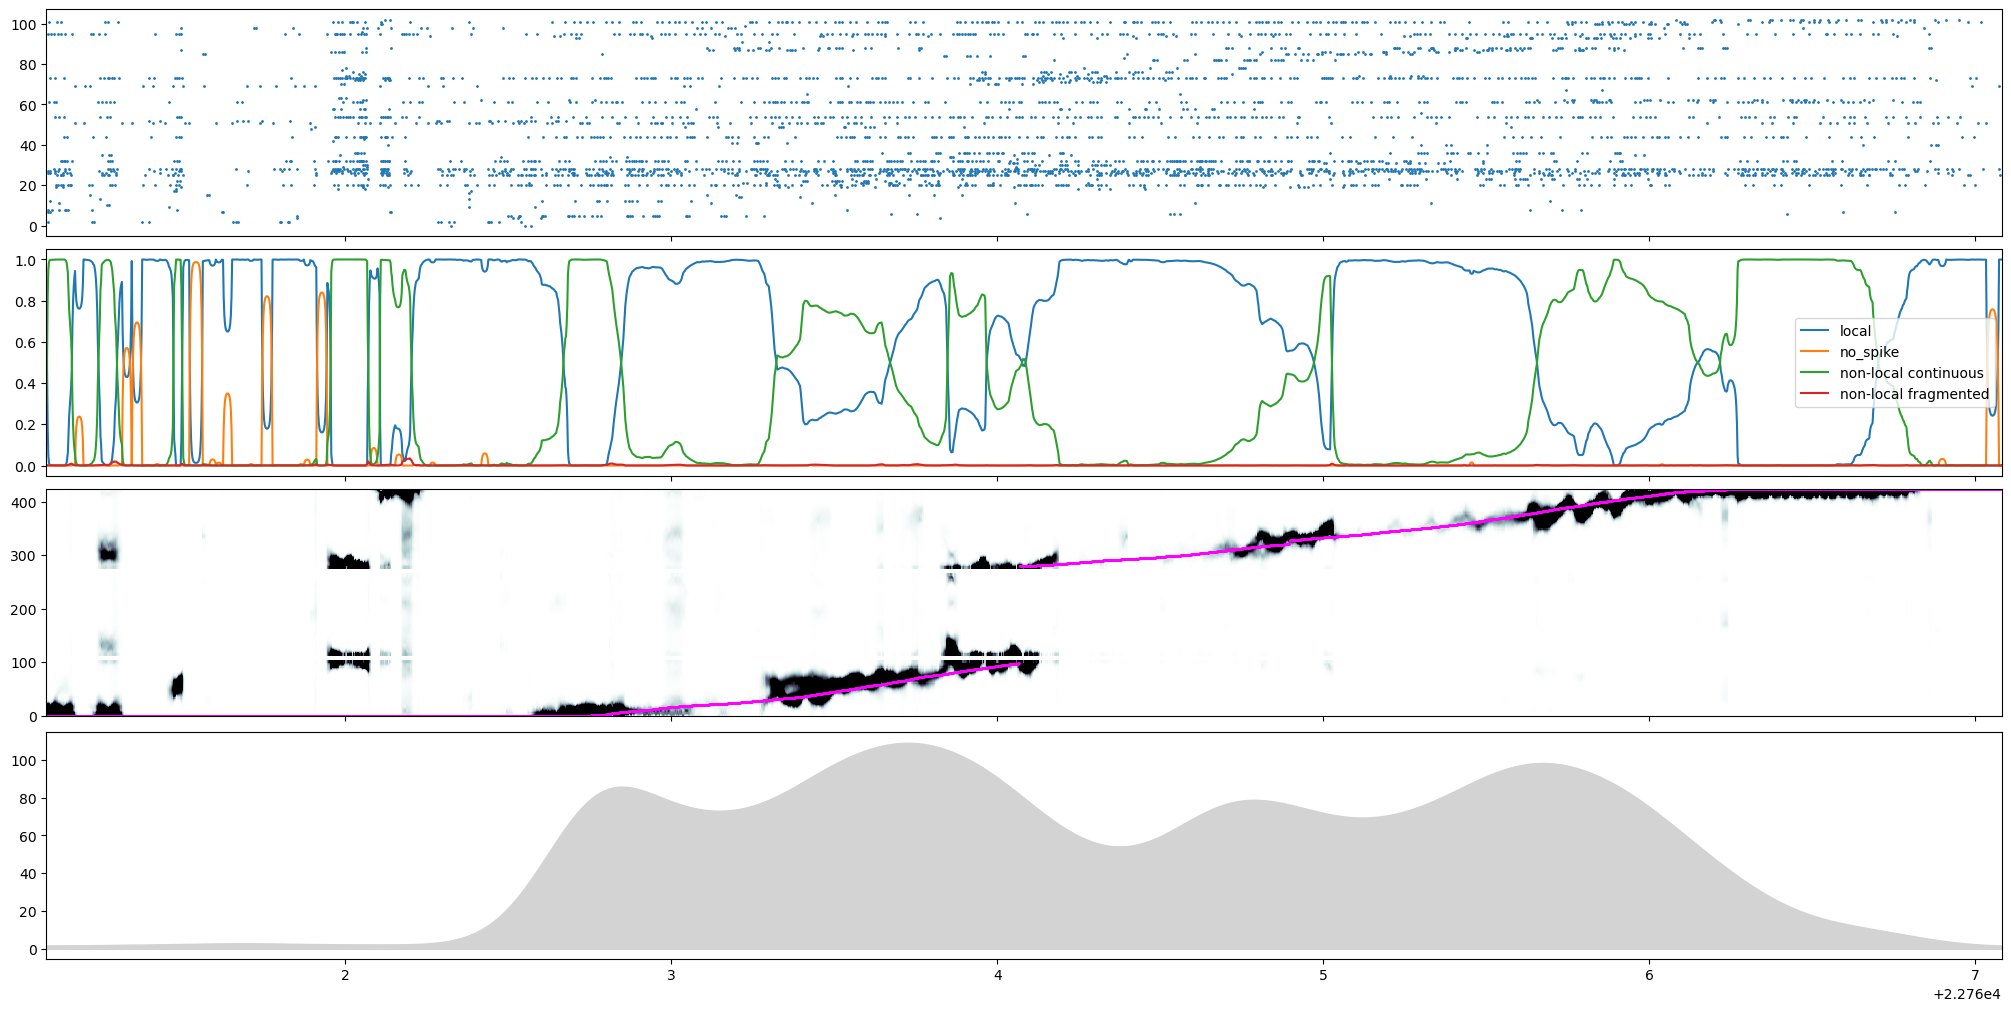

In [14]:
plot_switching_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    env,
    state_ind,
    acausal_state_probabilities,
    acausal_posterior,
    state_names,
    time_slice=slice(186_000, 189_000),
    figsize=(20, 10),
)

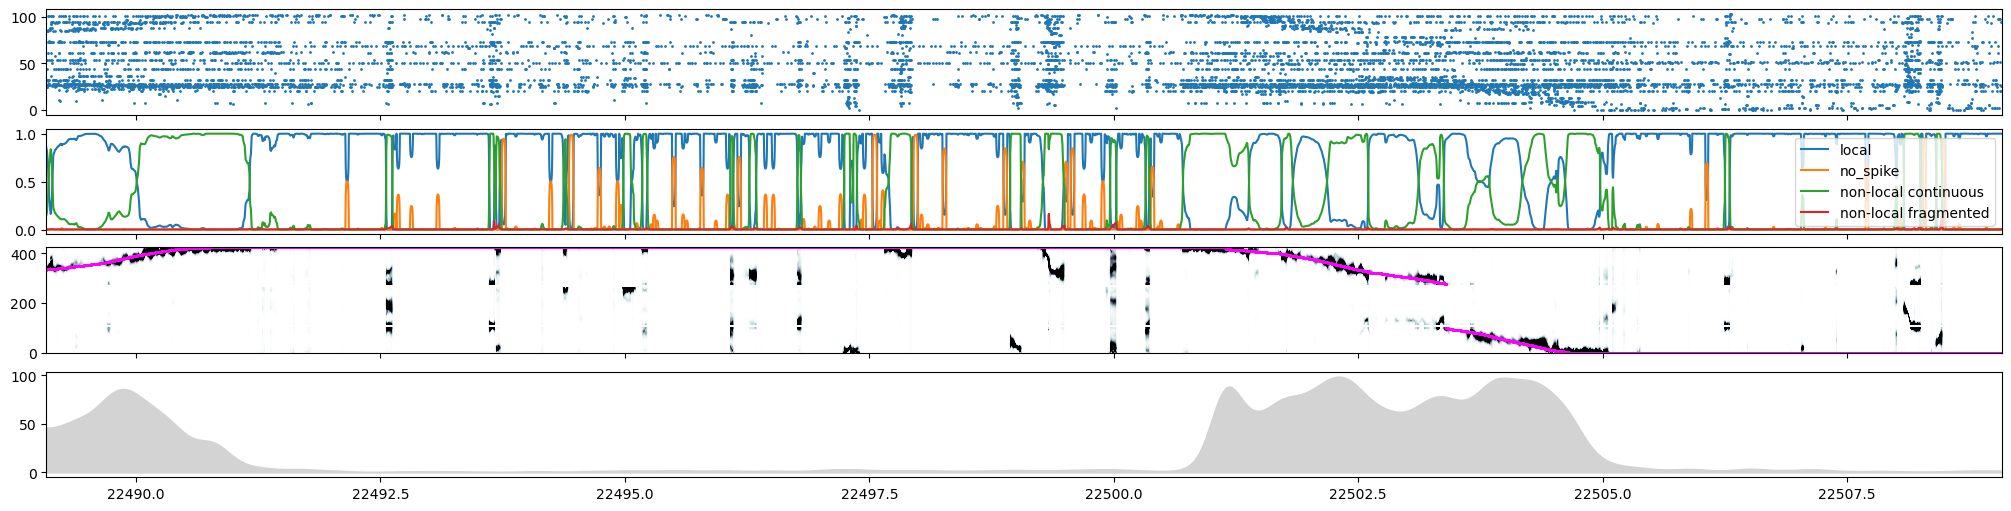

In [15]:
plot_switching_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    env,
    state_ind,
    acausal_state_probabilities,
    acausal_posterior,
    state_names,
    time_slice=slice(50_000, 60_000),
)

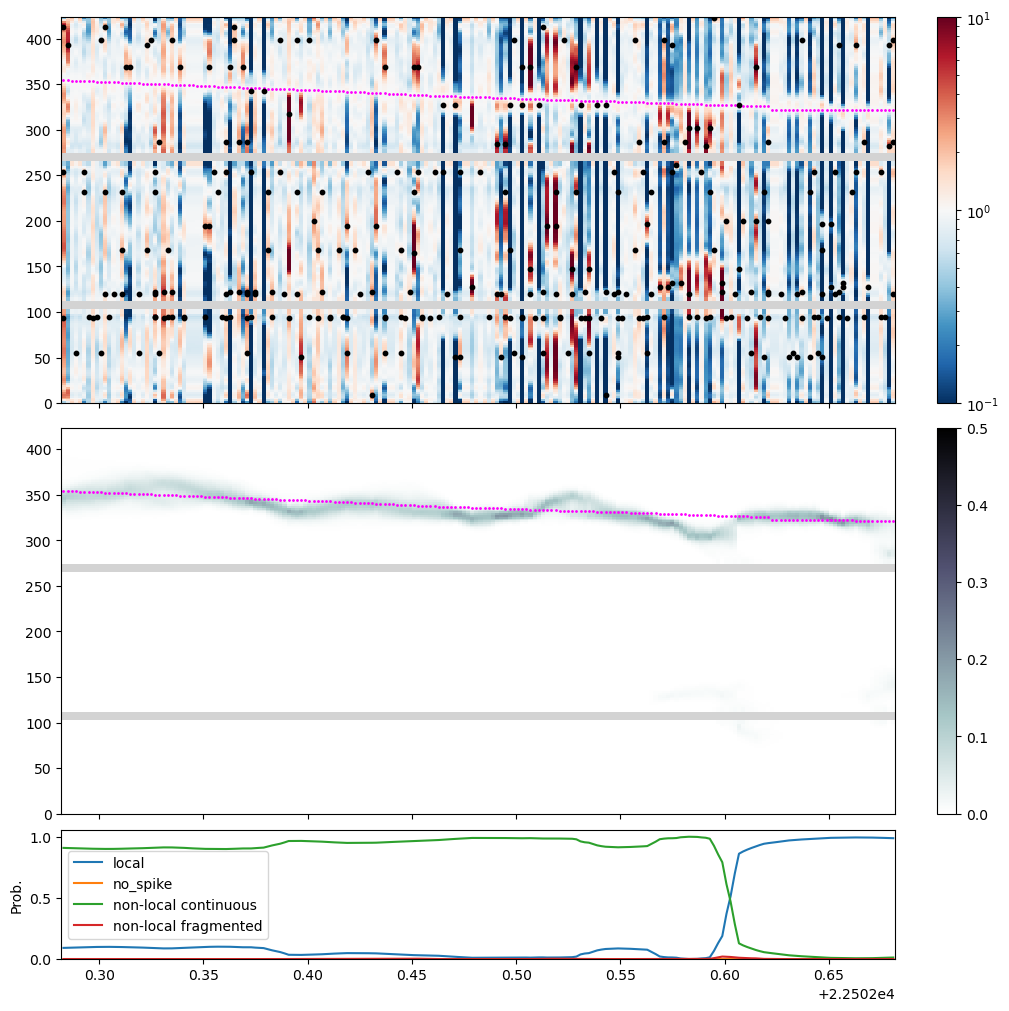

In [92]:
from src.test_non_local_switching_non_stationary_model import plot_likelihood_ratio

plot_likelihood_ratio(
    slice(56_600, 56_800),
    log_likelihood,
    acausal_posterior,
    acausal_state_probabilities,
    non_local_rates,
    spikes,
    position,
    env,
    time,
    state_ind,
    state_names,
    figsize=(10, 10),
)

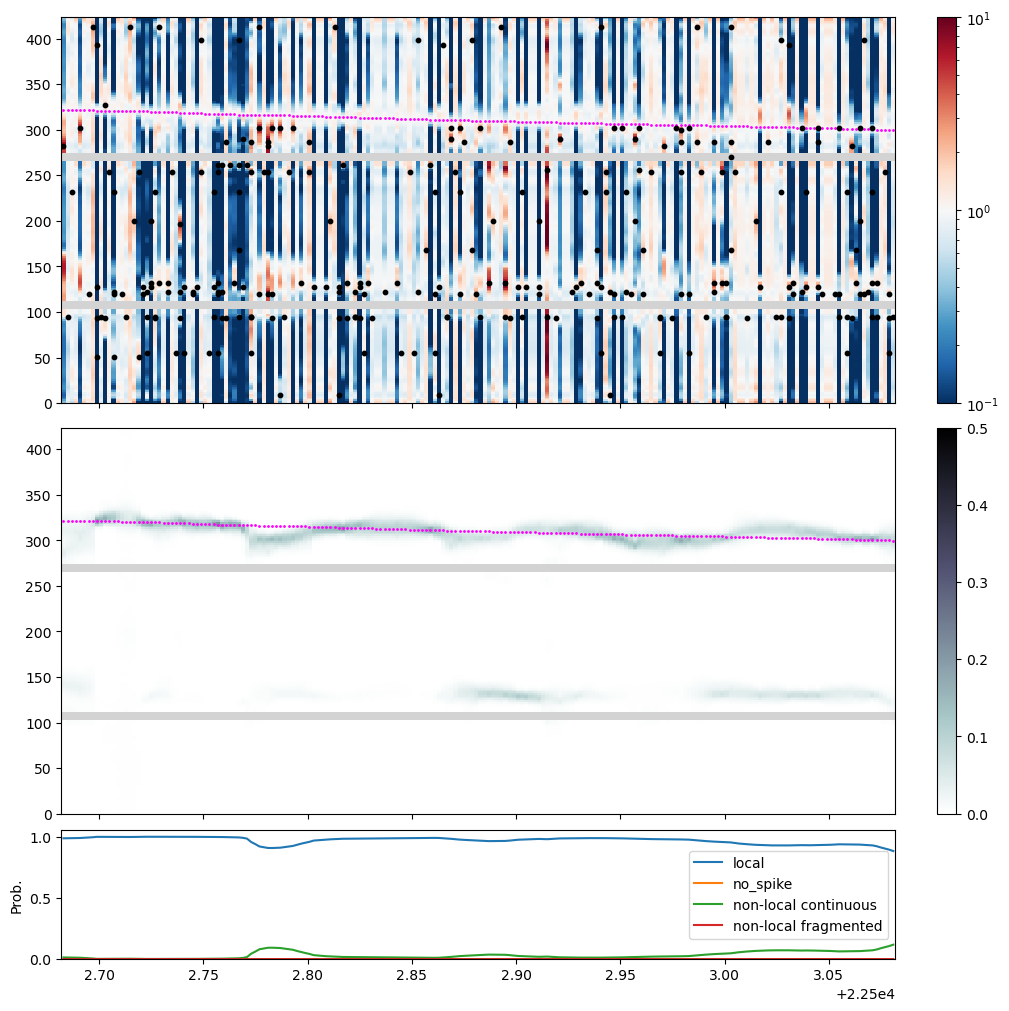

In [30]:
plot_likelihood_ratio(
    slice(56_800, 57_000),
    log_likelihood,
    acausal_posterior,
    acausal_state_probabilities,
    non_local_rates,
    spikes,
    position,
    env,
    time,
    state_ind,
    state_names,
    figsize=(10, 10),
)

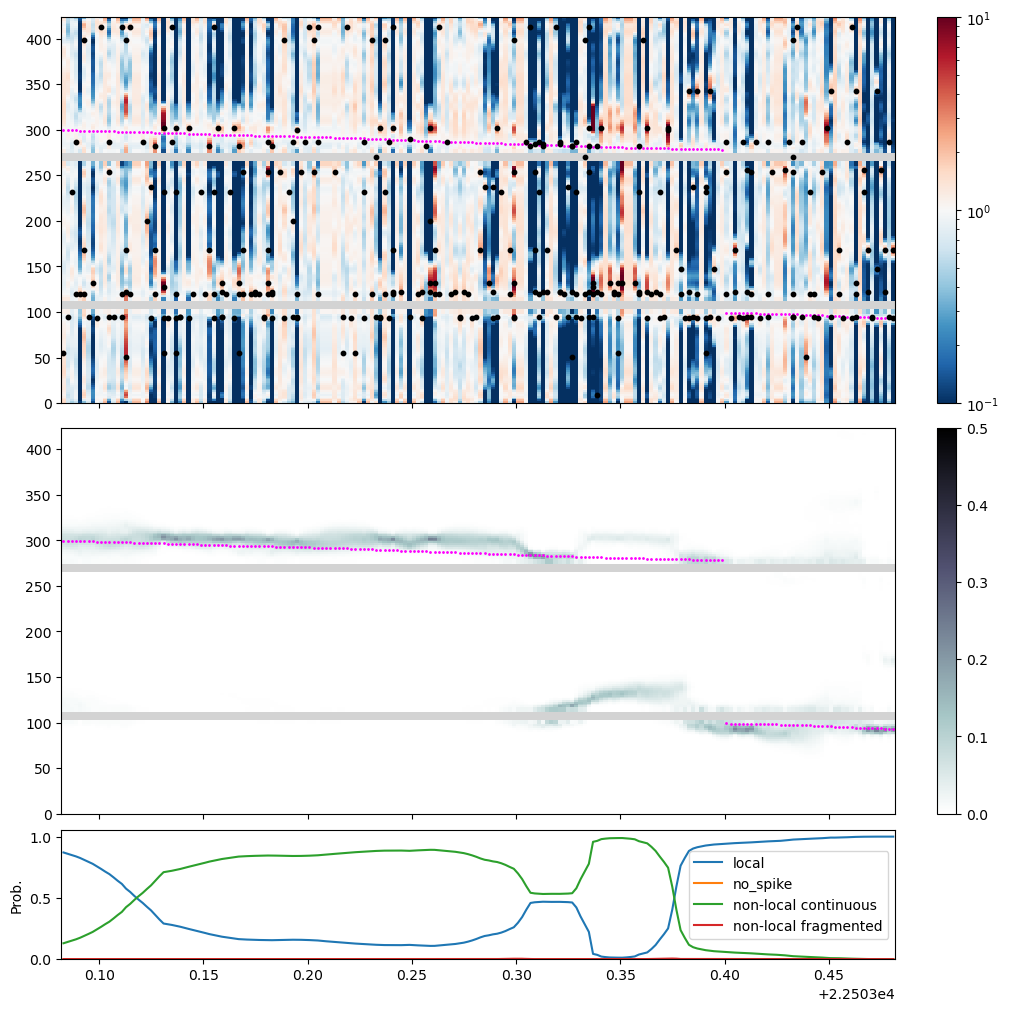

In [31]:
plot_likelihood_ratio(
    slice(57_000, 57_200),
    log_likelihood,
    acausal_posterior,
    acausal_state_probabilities,
    non_local_rates,
    spikes,
    position,
    env,
    time,
    state_ind,
    state_names,
    figsize=(10, 10),
)

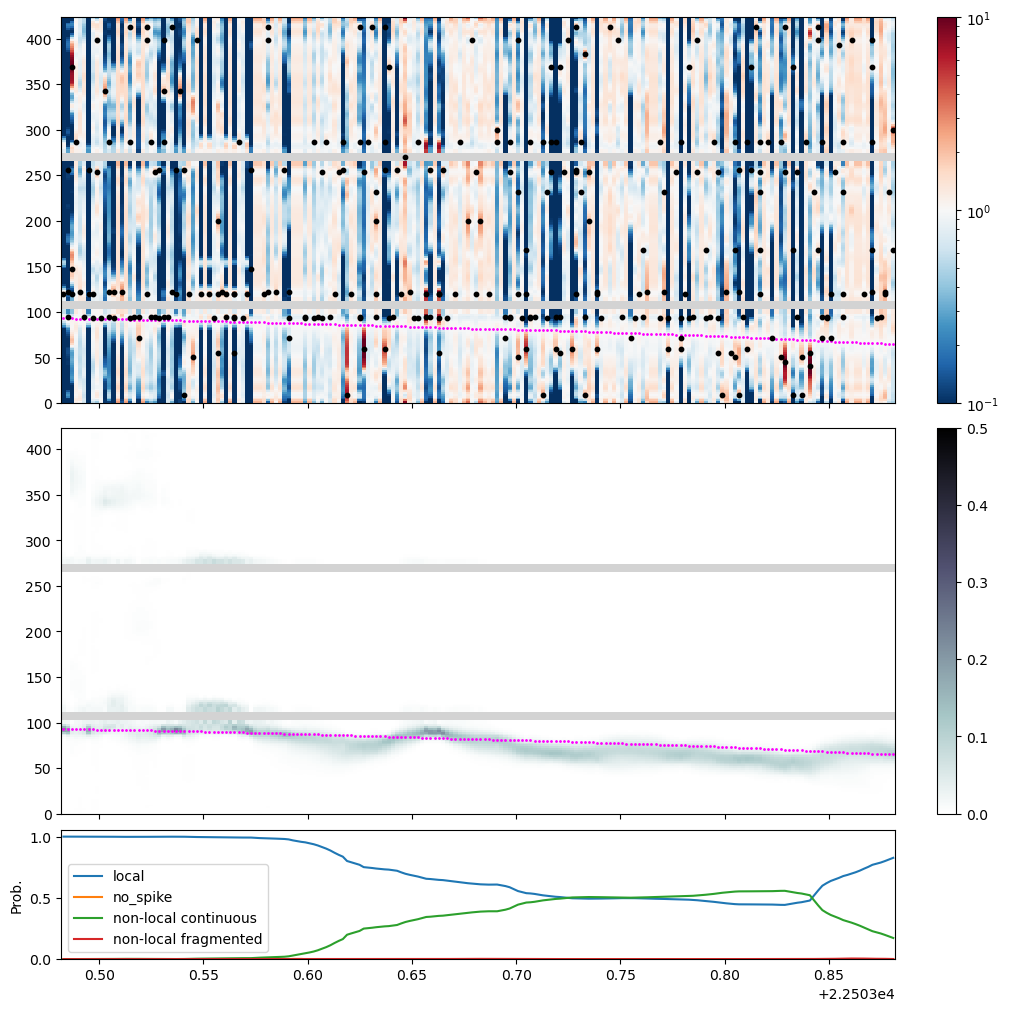

In [32]:
plot_likelihood_ratio(
    slice(57_200, 57_400),
    log_likelihood,
    acausal_posterior,
    acausal_state_probabilities,
    non_local_rates,
    spikes,
    position,
    env,
    time,
    state_ind,
    state_names,
    figsize=(10, 10),
)

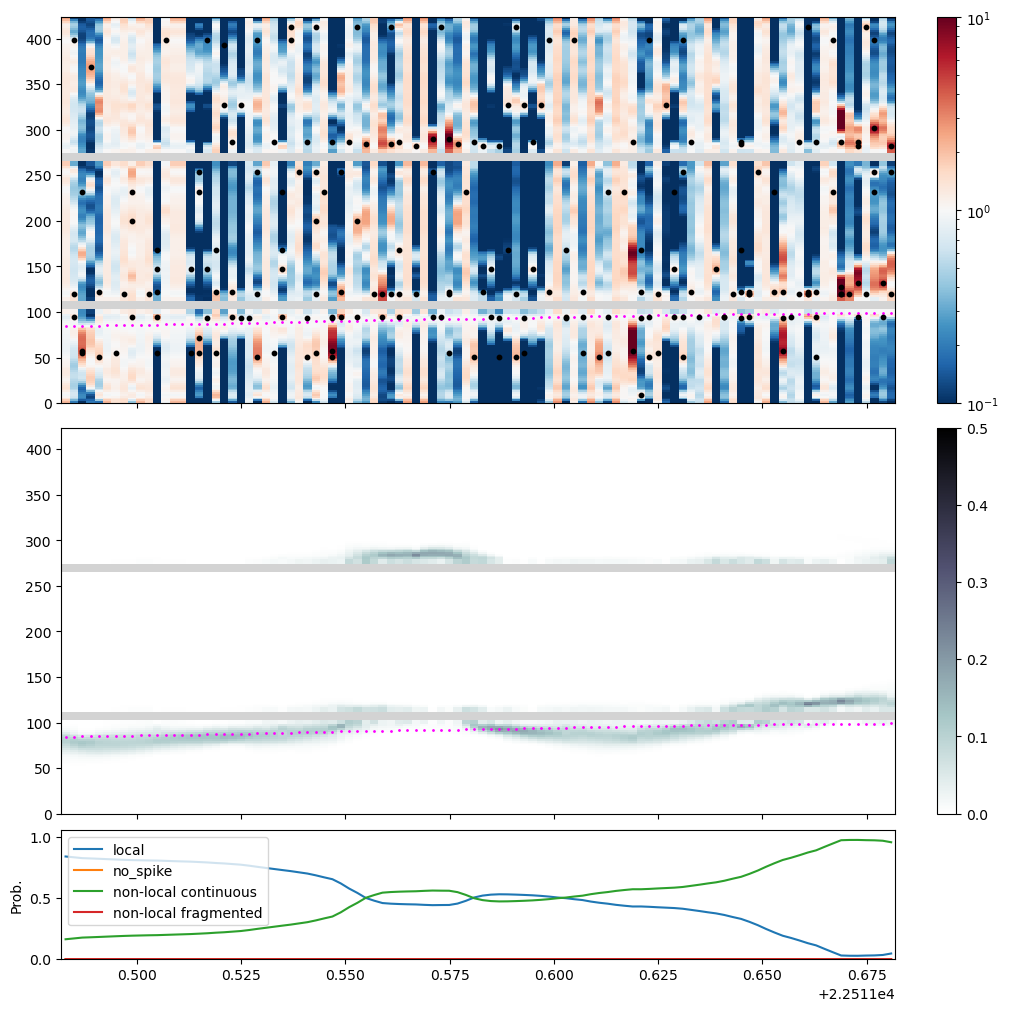

In [50]:
plot_likelihood_ratio(
    slice(61_200, 61_300),
    log_likelihood,
    acausal_posterior,
    acausal_state_probabilities,
    non_local_rates,
    spikes,
    position,
    env,
    time,
    state_ind,
    state_names,
    figsize=(10, 10),
)

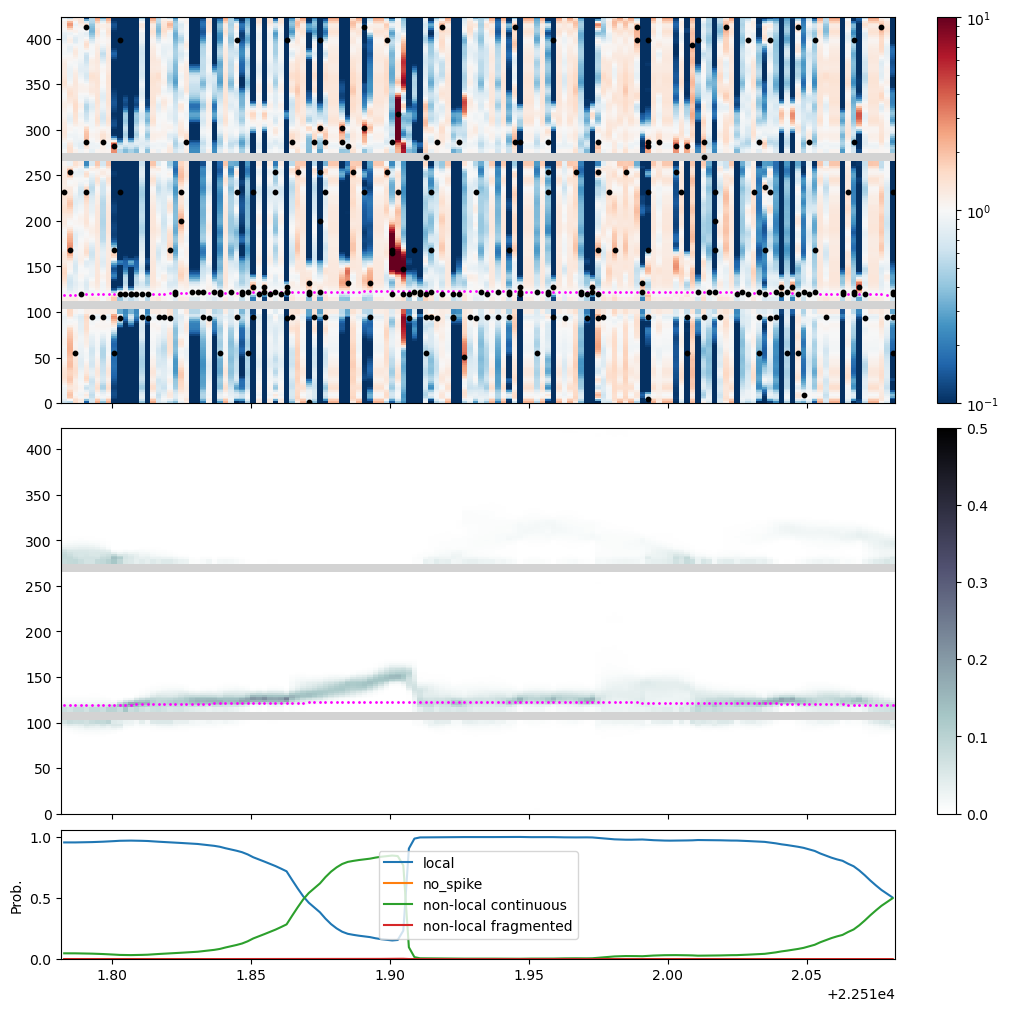

In [53]:
plot_likelihood_ratio(
    slice(61_350, 61_500),
    log_likelihood,
    acausal_posterior,
    acausal_state_probabilities,
    non_local_rates,
    spikes,
    position,
    env,
    time,
    state_ind,
    state_names,
    figsize=(10, 10),
)

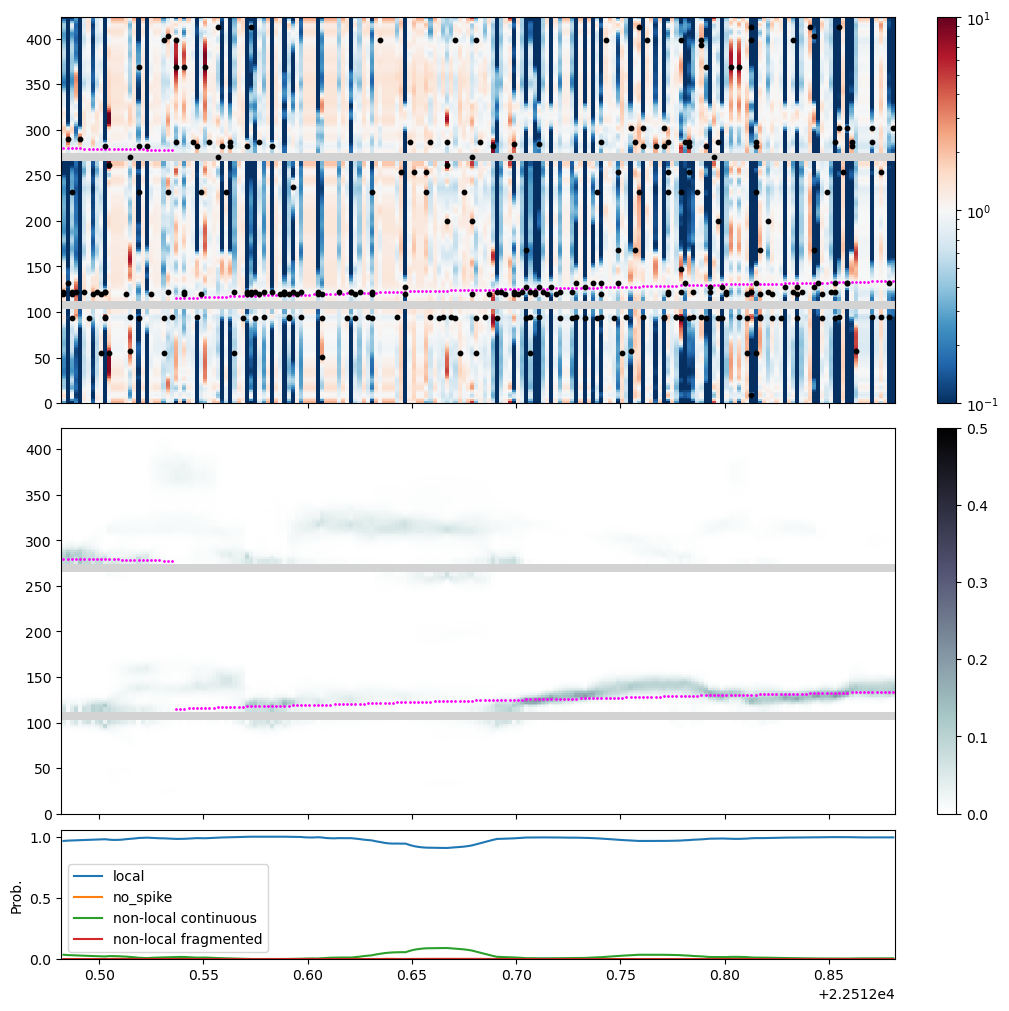

In [57]:
plot_likelihood_ratio(
    slice(61_700, 61_900),
    log_likelihood,
    acausal_posterior,
    acausal_state_probabilities,
    non_local_rates,
    spikes,
    position,
    env,
    time,
    state_ind,
    state_names,
    figsize=(10, 10),
)

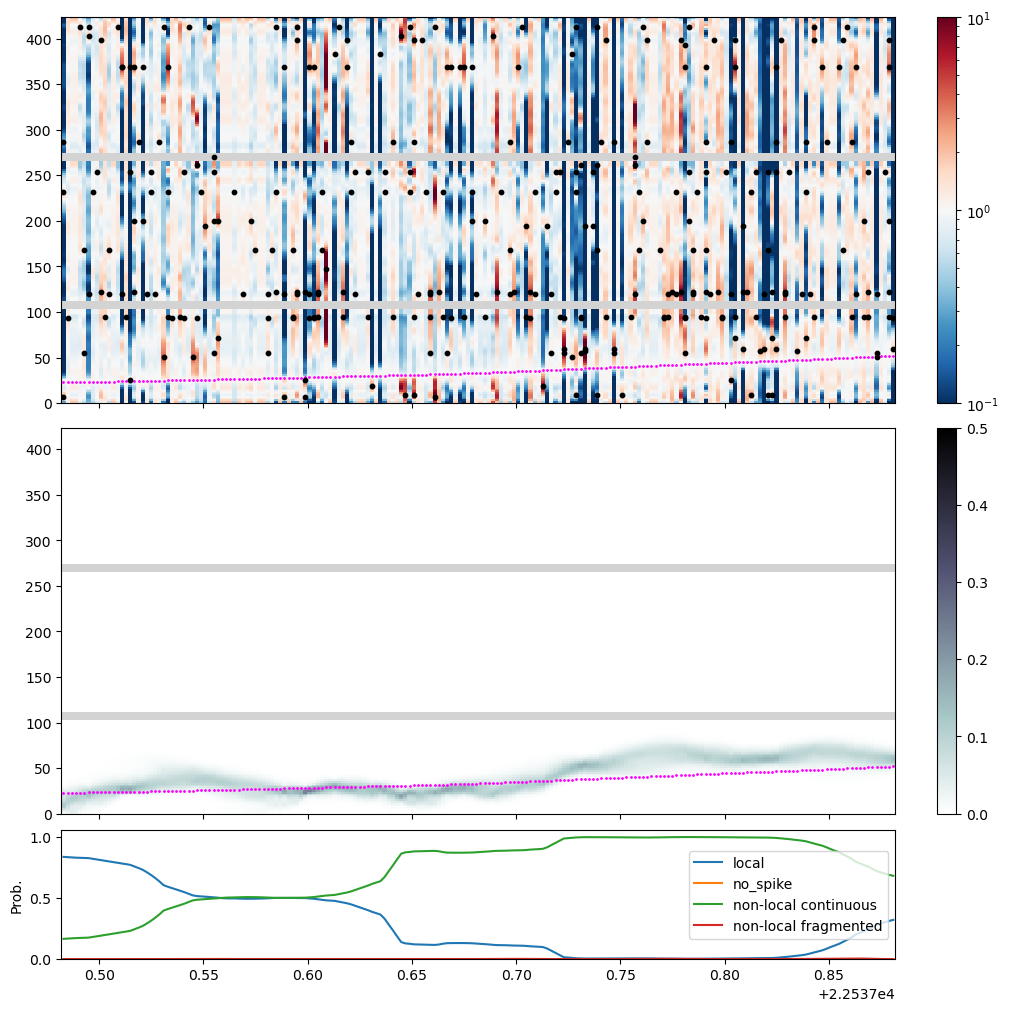

In [65]:
plot_likelihood_ratio(
    slice(74_200, 74_400),
    log_likelihood,
    acausal_posterior,
    acausal_state_probabilities,
    non_local_rates,
    spikes,
    position,
    env,
    time,
    state_ind,
    state_names,
    figsize=(10, 10),
)

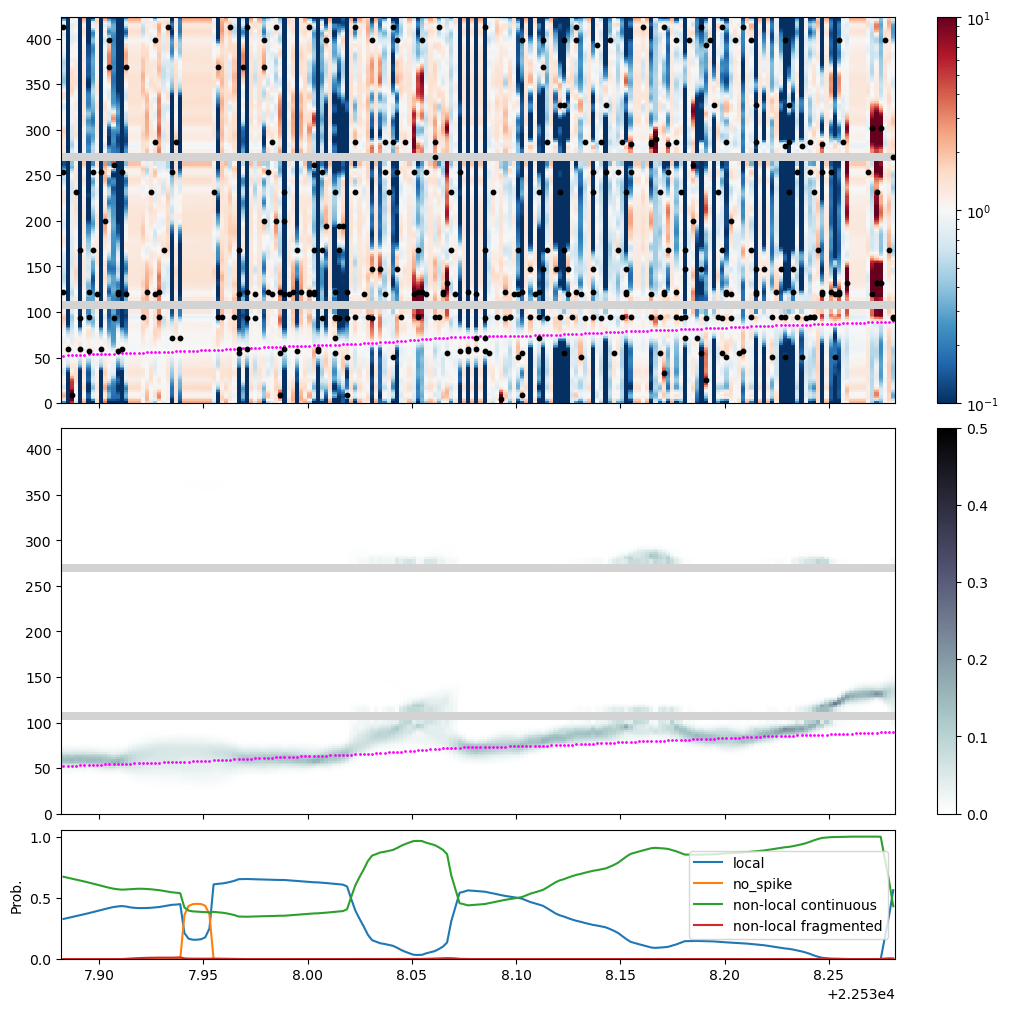

In [66]:
plot_likelihood_ratio(
    slice(74_400, 74_600),
    log_likelihood,
    acausal_posterior,
    acausal_state_probabilities,
    non_local_rates,
    spikes,
    position,
    env,
    time,
    state_ind,
    state_names,
    figsize=(10, 10),
)

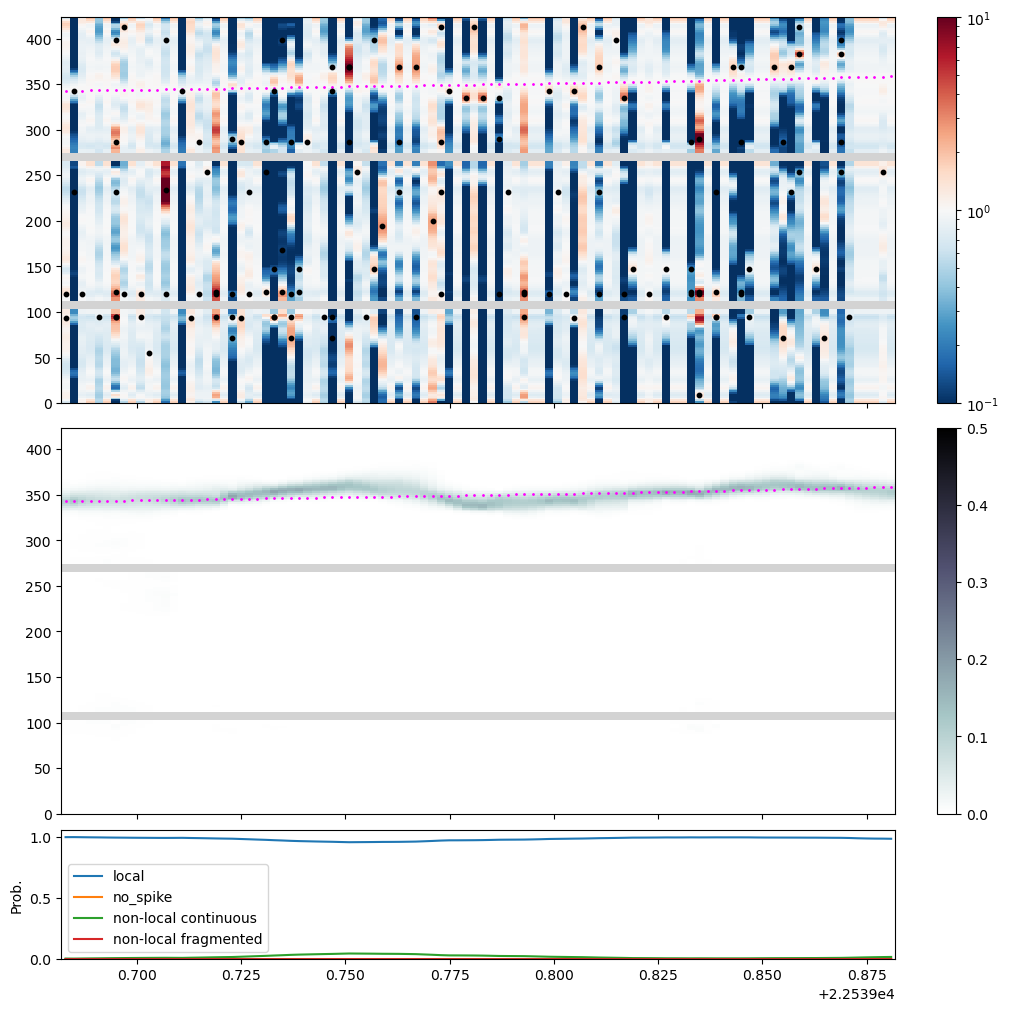

In [73]:
plot_likelihood_ratio(
    slice(75_300, 75_400),
    log_likelihood,
    acausal_posterior,
    acausal_state_probabilities,
    non_local_rates,
    spikes,
    position,
    env,
    time,
    state_ind,
    state_names,
    figsize=(10, 10),
)

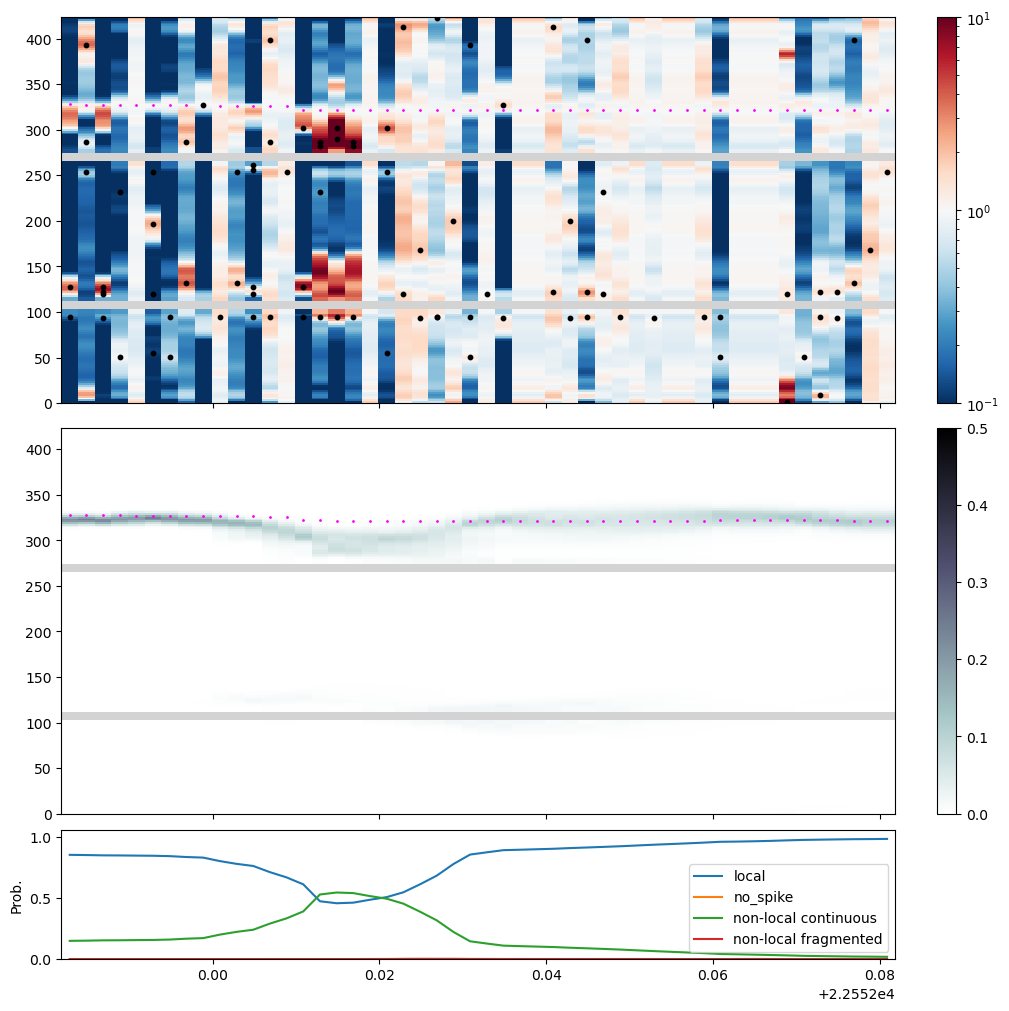

In [99]:
plot_likelihood_ratio(
    slice(81_450, 81_500),
    log_likelihood,
    acausal_posterior,
    acausal_state_probabilities,
    non_local_rates,
    spikes,
    position,
    env,
    time,
    state_ind,
    state_names,
    figsize=(10, 10),
)

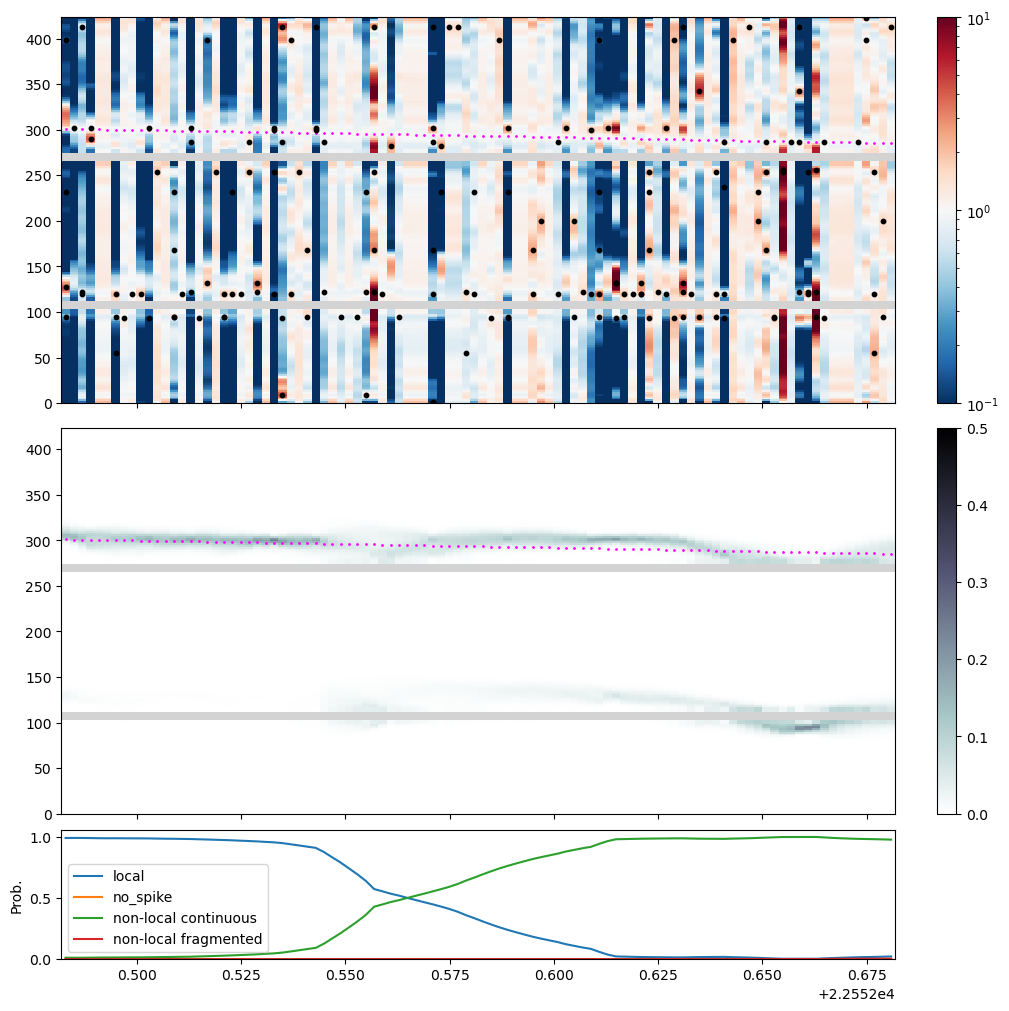

In [102]:
plot_likelihood_ratio(
    slice(81_700, 81_800),
    log_likelihood,
    acausal_posterior,
    acausal_state_probabilities,
    non_local_rates,
    spikes,
    position,
    env,
    time,
    state_ind,
    state_names,
    figsize=(10, 10),
)

Text(0.5, 1.0, 'Discrete State Transition')

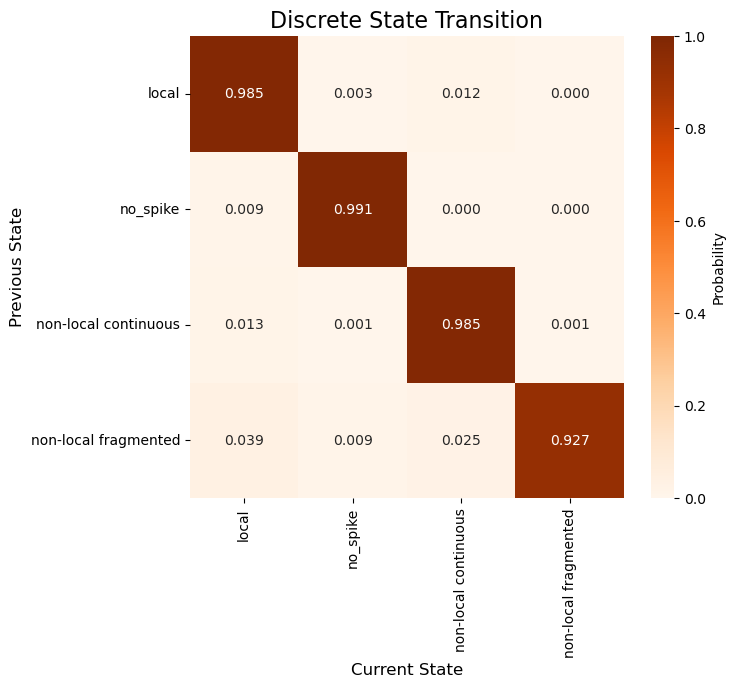

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

vmin, vmax, fmt = 0.0, 1.0, "0.03f"
label = "Probability"
cmap = "Oranges"

fig, ax = plt.subplots(1, 1, figsize=(7, 6))
sns.heatmap(
    data=discrete_state_transitions,
    vmin=vmin,
    vmax=vmax,
    annot=True,
    fmt=fmt,
    cmap=cmap,
    xticklabels=state_names,
    yticklabels=state_names,
    ax=ax,
    cbar_kws={"label": label},
)
ax.set_ylabel("Previous State", fontsize=12)
ax.set_xlabel("Current State", fontsize=12)
ax.set_title("Discrete State Transition", fontsize=16)